<a href="https://colab.research.google.com/github/felipekbatista/microscopic_images/blob/master/code_versions/v1/arrombado_v12x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports


In [9]:
import numpy as np
import cv2
import pandas as pd
from matplotlib import pyplot as plt
from skimage import io, img_as_float
import seaborn as sns
from skimage.filters import roberts, sobel, scharr, prewitt
from scipy import ndimage as nd
import seaborn as sns
from skimage import img_as_float, exposure, img_as_ubyte
from skimage.morphology import disk
from skimage.filters import rank


# Paths 

In [2]:
path_das_imagens = '/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01.jpg'
mask_path = '/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01_template.tiff'

# Feature engineering

## Filter bank

---
Functions to automate the creation of features for use in the model


- Use 'train_model' for prepare the image for training the model
- Use 'implement_model' for prepare the image for being loaded in the model

for version use, check function _process_image(img) and select version of use

### v1.0

The standard filter bank

In [28]:
def train_model(path, mask_path):
    'process the image for train the model'
    'retorns df with features and the label column'
    img = _importar_imagem(path)
    df_1 = _process_img(img)
    df_1 = _get_label(mask_path, df_1)
    print('train_model concluded')
    return df_1

def implement_model(path):
    'process the image for use in the trained model'
    ' returns: df, image dimensions and the img in grayscale'
    img = _importar_imagem(path)
    df_1 = _process_img(img)
    a,b = _get_shape(img)
    print('implement_model concluded')
    return df_1, a,b, img

def _importar_imagem(path):
    'enter the img path '
    'returns the img in grayscale'
    img = cv2.imread(path)
    #img = io.imread(path)
    #img = np.array(img, dtype=np.uint8)
    #dtype = np.uint8
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return img

def _get_shape(img):
    'returns shape of img'
    largura = img.shape[0]
    altura = img.shape[1]
    return largura, altura

def _process_img(img):
    'uses the img for feature extraction'
    df_1 = pd.DataFrame()
      
    'v1.0'
    """
    df_1['original_img'] = img.reshape(-1)
    df_1 = _get_gabor(df_1, img)
    df_1 = _get_canny(img, df_1)
    df_1 = _get_prewitt(img, df_1)
    df_1 = _get_roberts(img, df_1)
    df_1 = _get_scharr(img, df_1)
    df_1 = _get_sobel(img, df_1)
    for sigma in [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]:
        df_1 = _get_gaussian(img, df_1, sigma)
    """

    'v1.1'
    """
    df_1['original_img'] = img.reshape(-1)
    df_1 = _get_gabor(df_1, img)
    df_1 = _get_canny(img, df_1)
    df_1 = _get_prewitt(img, df_1)
    df_1 = _get_roberts(img, df_1)
    df_1 = _get_scharr(img, df_1)
    df_1 = _get_sobel(img, df_1)
    df_1 = _get_histogram_equalization(img, df_1)
    df_1 = _CLAHE(img, df_1)
    
    for sigma in [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]:
        df_1 = _get_gaussian(img, df_1, sigma)
    """
    'v1.2.0'
    #"""
    df_1['original_img'] = img.reshape(-1)
    for sigma in [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]:
        df_1 = _get_gaussian(img, df_1, sigma)
    #"""

    'v1.2.1'
    """
    df_1['original_img'] = img.reshape(-1)
    """
    'v1.2.2'
    """   
    for sigma in [0.25,0.5,0.75,1,1.25,1.5,1.75,2,2.25,2.5,2.75,3]:
        df_1 = _get_gaussian(img, df_1, sigma)
    """

    print('function executed')
    return df_1

def _get_gabor(df_1, img):
    'create multiple gabor kernels for applying as filter in the image'

    # GABOR filter
    pi = np.pi
    num = 1
    kernels = []

    theta_bank = [0, 0.7853981633974483] 
    sigma = 1
    lamda_bank = [0.7853981633974483, 1.5707963267948966,2.356194490192345 ]
    gamma_bank = [0.05, 0.5, 1]

    for theta in theta_bank:
        for lamda in lamda_bank:
            for gamma in gamma_bank:
                gabor_label = 'gabor'+str(num)
                ksize = 5
                kernel = cv2.getGaborKernel((ksize,ksize), sigma,theta, lamda, gamma,0, ktype = cv2.CV_32F)
                kernels.append(kernel) # add o kernel criado numa lista
                filtered_img = cv2.filter2D(img, cv2.CV_8UC3, kernel) #filtra a imagem com o kernel_gabor
                df_1[gabor_label] = filtered_img.reshape(-1) # add a imagem filtrada no df, como um feature
                #print(gabor_label, 'theta',theta, 'sigma', sigma, 'lamda', lamda, 'gamma', gamma)
                num += 1

    return df_1


'''
    for theta in range(2): #humber of thetas
        theta = theta / 8 * np.pi
        for sigma in (0.5, 1, 1.5, 2, 2.5, 3): # uses sigma 1 and 3
            for lamda in np.arange(0, pi, pi/8):
                for gamma in (0.05 , 0.5, 1, 1.5 ):
                    #generate the gabor kernel
                    gabor_label = 'gabor'+str(num)
                    ksize = 5
                    kernel = cv2.getGaborKernel((ksize,ksize), sigma,theta, lamda, gamma,0, ktype = cv2.CV_32F)
                    
                    kernels.append(kernel) # add o kernel criado numa lista
                    
                    filtered_img = cv2.filter2D(img_1, cv2.CV_8UC3, kernel) #filtra a imagem com o kernel_gabor
                    df_1[gabor_label] = filtered_img.reshape(-1) # add a imagem filtrada no df, como um feature
                    print(gabor_label, 'theta',theta, 'sigma', sigma, 'lamda', lamda, 'gamma', gamma)
                    num += 1
'''
# gabor params filter data
    
    
    
        
def _get_canny(img, df_1):
    #edges - canny
    canny = cv2.Canny(img, 100,200)
    df_1['canny'] = canny.reshape(-1)
    return df_1

def _get_roberts(img, df_1):
    roberts_ = roberts(img)
    roberts_ = roberts_.reshape(-1)
    df_1['roberts'] = roberts_
    return df_1

def _get_sobel(img, df_1):
    sobel_ = sobel(img)
    sobel_ = sobel_.reshape(-1)
    df_1['sobel_'] = sobel_
    return df_1

def _get_scharr(img, df_1):
    scharr_ = scharr(img)
    scharr_ = scharr_.reshape(-1)
    df_1['scharr'] = scharr_
    return df_1

def _get_prewitt(img, df_1):
    prewitt_ = prewitt(img)
    prewitt_ = prewitt_.reshape(-1)
    df_1['prewitt'] = prewitt_
    return df_1

def _get_gaussian(img, df_1, sigma_):
    gaussian_label = 'gauss_sigma_' + str(sigma_)
    gaussian = nd.gaussian_filter(img, sigma_)
    gaussian = gaussian.reshape(-1)
    df_1[gaussian_label] = gaussian
    return df_1

def _get_label(mask_path, df_1):
    'insert labeled img for the model and returns the labels to the df'
    'the labeled img is returned as a binary img'
    labeled_img = _importar_imagem(mask_path)
    segm_1 = (labeled_img > 0)
    all_segm = np.zeros( (labeled_img.shape[0],labeled_img.shape[1]), dtype=float)
    all_segm = segm_1 
    all_segm = all_segm.astype(float)
    df_1['labels'] = all_segm.reshape(-1)
    return df_1


### v1.1

Histogram equalization filter bank

added with the update of v1.1

In [ ]:
from skimage import img_as_float, exposure, img_as_ubyte
from skimage.morphology import disk
from skimage.filters import rank

def _get_histogram_equalization(img, df_1):
    img_float = img

    # Contrast stretching
    p2, p98 = np.percentile(img_float, (2, 98), )
    img_rescale = exposure.rescale_intensity(img_float, in_range=(p2, p98))
    img_rescale = _rescale(img_rescale)
    img_rescale = img_rescale.reshape(-1)
    df_1['contrast_stretching'] = img_rescale
    
    # Equalization
    img_eq = exposure.equalize_hist(img_float)
    img_eq = _rescale(img_eq)
    img_eq = img_eq.reshape(-1)
    df_1['equalization'] = img_eq

    # Adaptive Equalization
    img_adapteq = exposure.equalize_adapthist(img_float, clip_limit=0.03)
    img_adapteq = _rescale(img_adapteq)
    img_adapteq = img_adapteq.reshape(-1)
    df_1['adapteq'] = img_adapteq

    return df_1



def _rescale(img):
    'use this for rescaling some images that are float and turn them ito uint8'

    a,b = img.shape[0], img.shape[1]
    img = img.reshape(-1)
    max_, min_ = max(img), min(img)
    
    for i in range(len(img)):
        numm = img[i]/(max_-min_) * 255
        img[i] = numm
    img = np.uint8(img)
    img = img.reshape(a,b)
      
    return img


def plot_img_and_histograms(img, img_rescale, img_eq, img_adapteq):
    'plot the images from the histogram equalization function'
    'input: img, img_rescale, img_eq, img_adapteq, cmap = True ou False'
    
    fig, axs = plt.subplots(nrows = 4, ncols = 2,figsize=(10,20))
    
    axs[0,0].imshow(img, cmap = 'gray')
    axs[0,0].set_title('original image')
    axs[0,1].hist(img.flatten(),bins = 100)
    axs[0,1].set_title('original image')
    
    axs[1,0].imshow(img_rescale, cmap = 'gray')
    axs[1,0].set_title('contrast stretching image')
    axs[1,1].hist(img_rescale.flatten(),bins = 100)
    
    axs[2,0].imshow(img_eq, cmap = 'gray')
    axs[2,0].set_title('equalization')
    axs[2,1].hist(img_eq.flatten(),bins = 100)
    
    axs[3,0].imshow(img_adapteq, cmap = 'gray')
    axs[3,0].set_title('adaptative equalization')
    axs[3,1].hist(img_adapteq.flatten(), bins = 100)
    return 

def _CLAHE(image, df_1):
    'input: image'
    # Load an example image
    img = image
    #img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    #img = img_as_ubyte(img)
    
    # Global equalize
    img_rescale = exposure.equalize_hist(img)
        
    # Equalization
    selem = disk(30)
    img_eq = rank.equalize(img, selem=selem)
    
    img_rescale = _rescale(img_rescale)
    img_rescale = img_rescale.reshape(-1)
    df_1['clahe_1'] = img_rescale

    img_eq = _rescale(img_eq)
    img_eq = img_eq.reshape(-1)
    df_1['clahe_2'] = img_eq
    return df_1

def get_quality_dom(img_):
    'input: img_'
    iqa = DOM()
    'returns the sharpness score of the image and its equalization'
    img_1, img_2, img_3, img_4 = histogram_equalization(img_)
    img_5, img_6 = CLAHE(img_)
    print('original_score:', iqa.get_sharpness(img_1).round(8))
    print('standart histogram')
    print('contrast stretching:',iqa.get_sharpness(img_2).round(8))
    print('equalization',iqa.get_sharpness(img_3).round(8))
    print('adaptative equalization',iqa.get_sharpness(img_4).round(8))
    print('CLAHE')
    print('equalize hist', iqa.get_sharpness(img_5))
    print('equalize', iqa.get_sharpness(img_6))
    print('end function\n')
    return 



### v1.2.x

the feature bank is composed of the original image in grayscale and gaussian filters
For using it, check filter bank v1.0 and select it in function _process_image

v1.2.0

original and gaussian

v1.2.1

original image only in db

v1.2.2

gaussian only in db

In [ ]:
#df1 = treina_modelo() ('/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01.jpg', '/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01_template.tiff')
#path_das_imagens = /content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01.jpg'
#mask_path = '/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01_template.tiff'

---

# ML

## DAta

In [4]:
print(path_das_imagens)
print(mask_path)

/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01.jpg
/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_01_template.tiff


In [29]:
df = pd.DataFrame()
for i in range(1,5):
        # img path
        df1 = train_model('/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_0{}.jpg'.format(i),'/content/drive/My Drive/Colab Notebooks/arrombado/modelos/m_0{}_template.tiff'.format(i))
        
        #add the previous db into the main df
        df = pd.concat([df, df1] )
        df.reset_index(drop = True, inplace = True)
        print('run: ', i, 'df.shape = ', df.shape)
    


function executed
train_model concluded
run:  1 df.shape =  (3137536, 14)
function executed
train_model concluded
run:  2 df.shape =  (6275072, 14)
function executed
train_model concluded
run:  3 df.shape =  (9412608, 14)
function executed
train_model concluded
run:  4 df.shape =  (12550144, 14)


## Data split

In [30]:
df.columns

Index(['original_img', 'gauss_sigma_0.25', 'gauss_sigma_0.5',
       'gauss_sigma_0.75', 'gauss_sigma_1', 'gauss_sigma_1.25',
       'gauss_sigma_1.5', 'gauss_sigma_1.75', 'gauss_sigma_2',
       'gauss_sigma_2.25', 'gauss_sigma_2.5', 'gauss_sigma_2.75',
       'gauss_sigma_3', 'labels'],
      dtype='object')

In [31]:
x = df1.drop(labels = ['labels'], axis = 1)
y = df1['labels']
x.columns

Index(['original_img', 'gauss_sigma_0.25', 'gauss_sigma_0.5',
       'gauss_sigma_0.75', 'gauss_sigma_1', 'gauss_sigma_1.25',
       'gauss_sigma_1.5', 'gauss_sigma_1.75', 'gauss_sigma_2',
       'gauss_sigma_2.25', 'gauss_sigma_2.5', 'gauss_sigma_2.75',
       'gauss_sigma_3'],
      dtype='object')

This datasplit was used for the first run, to train the model

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y , test_size = 0.4, random_state = 42)

## Model Train

RFC with 10 estimators

In [32]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 10, random_state = 42)
model.fit(x, y)
ypredict_1 = model.predict(x)

## model evaluation

In [ ]:
from sklearn import metrics
print('dados usados: xtrain \n')
print('accuracy: ', metrics.accuracy_score(y, ypredict_1).round(2))

print('\n\ndados usados: xtest zn')    

#ypredict_2 = model.predict(xtest)
#print('accuracy: ', metrics.accuracy_score(ytest, ypredict_2).round())



dados usados: xtrain 

accuracy:  1.0


dados usados: xtest zn


## Feature importances

### v1.0

In [ ]:
importances = list(model.feature_importances_.round(4))
importances

features = pd.DataFrame( data = importances, index= x.columns)
features.sort_values(by = 0 ,ascending = False, inplace=True)
features.shape
features

,0
original_img,0.1216
gabor2,0.1142
gauss_sigma_0.75,0.1138
gauss_sigma_1.5,0.0702
gauss_sigma_2.5,0.0622
gauss_sigma_0.5,0.0606
gabor12,0.0568
prewitt,0.0347
sobel_,0.0346
scharr,0.0287


### v1.1

In [ ]:
importances = list(model.feature_importances_.round(4))
importances

features = pd.DataFrame( data = importances, index= x.columns)
features.sort_values(by = 0 ,ascending = False, inplace=True)
features.shape
features

,0
gabor12,0.2035
gabor3,0.1089
original_img,0.0674
gauss_sigma_0.75,0.0663
gauss_sigma_2.25,0.0583
gauss_sigma_3,0.0580
clahe_2,0.0407
adapteq,0.0368
sobel_,0.0312
prewitt,0.0279


---


Gauss sigma features seems to be preety good for this model


---

### v1.2.0
gaussian and original

In [ ]:
importances = list(model.feature_importances_.round(4))
importances

features = pd.DataFrame( data = importances, index= x.columns)
features.sort_values(by = 0 ,ascending = False, inplace=True)
features.shape
features

,0
gauss_sigma_1,0.2480
gauss_sigma_0.25,0.1432
gauss_sigma_1.5,0.1412
gauss_sigma_0.75,0.0997
gauss_sigma_0.5,0.0910
original_img,0.0554
gauss_sigma_3,0.0419
gauss_sigma_1.25,0.0365
gauss_sigma_2,0.0344
gauss_sigma_2.75,0.0313


###v1.2.1

original

In [24]:
importances = list(model.feature_importances_.round(4))
importances

features = pd.DataFrame( data = importances, index= x.columns)
features.sort_values(by = 0 ,ascending = False, inplace=True)
features.shape
features

,0
original_img,1.0


### v1.2.2

gaussian

In [15]:
importances = list(model.feature_importances_.round(4))
importances

features = pd.DataFrame( data = importances, index= x.columns)
features.sort_values(by = 0 ,ascending = False, inplace=True)
features.shape
features

,0
gauss_sigma_0.75,0.3092
gauss_sigma_0.5,0.2106
gauss_sigma_1,0.0943
gauss_sigma_1.25,0.0866
gauss_sigma_0.25,0.0568
gauss_sigma_3,0.0449
gauss_sigma_1.5,0.0424
gauss_sigma_1.75,0.0355
gauss_sigma_2.25,0.0347
gauss_sigma_2.75,0.0317


## feature distributions

### v1.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Score (fraction)')

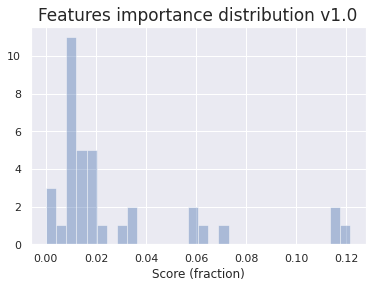

In [ ]:
sns.set(style = 'darkgrid')
ax = sns.distplot(features, kde = False, bins = 30)
ax.set_title('Features importance distribution v1.0', fontsize = 17)
ax.set_xlabel('Score (fraction)')

### v1.1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Score (fraction)')

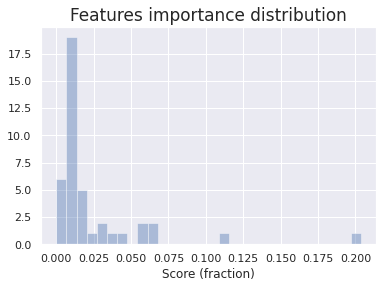

In [ ]:
sns.set(style = 'darkgrid')
ax = sns.distplot(features, kde = False, bins = 30)
ax.set_title('Features importance distribution', fontsize = 17)
ax.set_xlabel('Score (fraction)')

The KDE plot shows some 3 zones of interest: a low score, medium score and high score zones. 




### v1.2.0

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Score (fraction)')

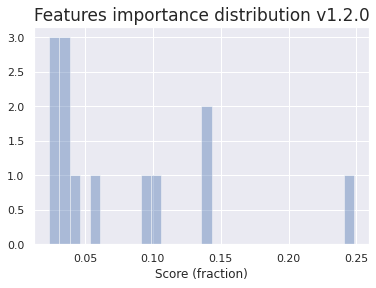

In [ ]:
sns.set(style = 'darkgrid')
ax = sns.distplot(features, kde = False, bins = 30)
ax.set_title('Features importance distribution v1.2.0', fontsize = 17)
ax.set_xlabel('Score (fraction)')

### v1.2.1

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Score (fraction)')

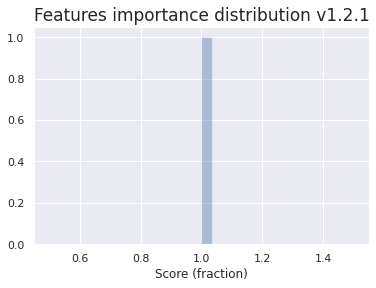

In [ ]:
sns.set(style = 'darkgrid')
ax = sns.distplot(features, kde = False, bins = 30)
ax.set_title('Features importance distribution v1.2.1', fontsize = 17)
ax.set_xlabel('Score (fraction)')

### v1.2.2

In [ ]:
sns.set(style = 'darkgrid')
ax = sns.distplot(features, kde = False, bins = 30)
ax.set_title('Features importance distribution v1.2.2', fontsize = 17)
ax.set_xlabel('Score (fraction)')

## Test with other images

left side is the processed image, right side is the image in grayscale 

### v1.0

function executed


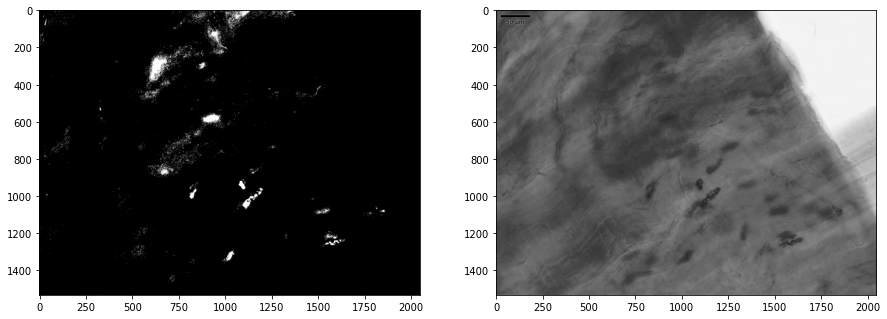

In [ ]:
path_das_imagens
df2, a, b, imagem = implementa_modelo('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
fig, axs = plt.subplots(ncols = 2,figsize=(15,15))
axs[0].imshow(img_2_reshape, cmap = 'gray', )
axs[1].imshow(imagem, cmap = 'gray', )

function executed
implement_model concluded


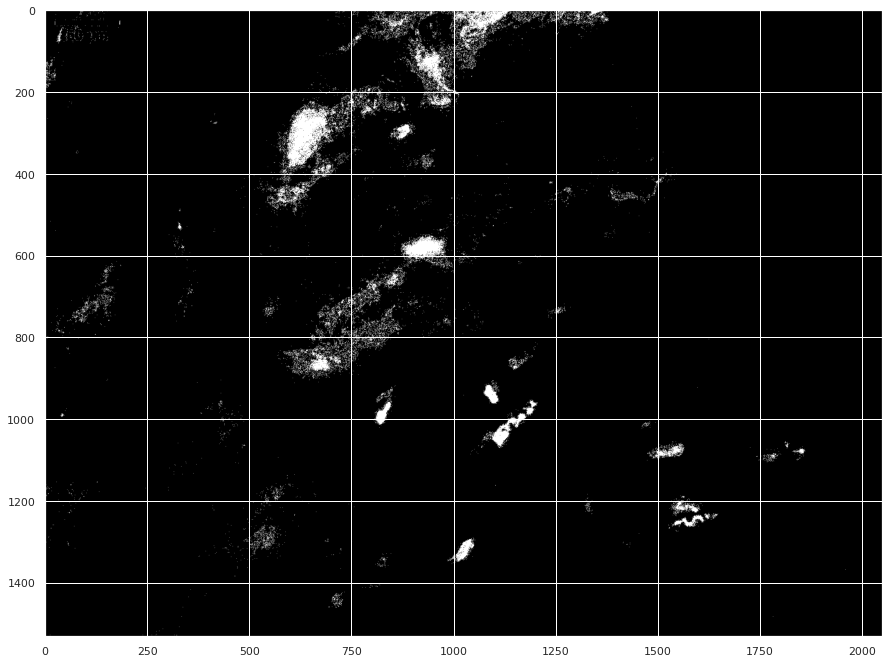

In [ ]:
path_das_imagens
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.imshow(img_2_reshape, cmap = 'gray', )


function executed


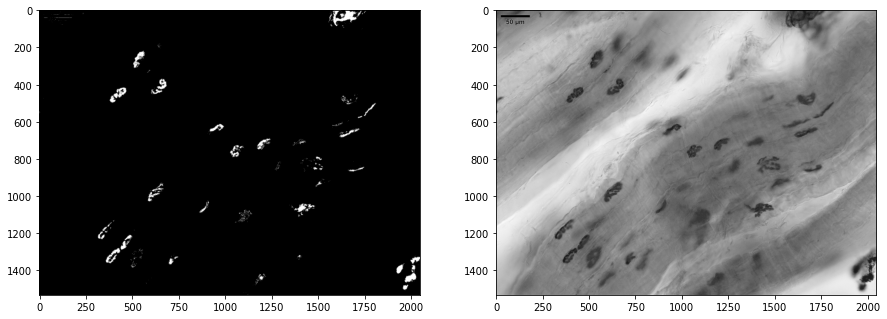

In [ ]:
df2, a, b, imagem = implementa_modelo('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
fig, axs = plt.subplots(ncols= 2,figsize=(15,15))
axs[0].imshow(img_2_reshape, cmap = 'gray', )
axs[1].imshow(imagem, cmap = 'gray', )

function executed
implement_model concluded


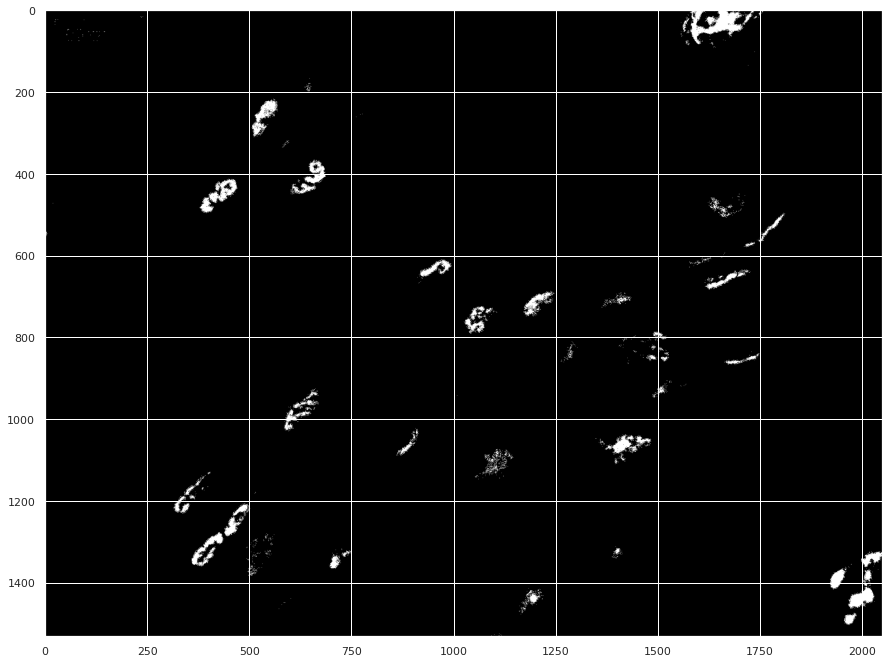

In [ ]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.imshow(img_2_reshape, cmap = 'gray', )


function executed
implement_model concluded


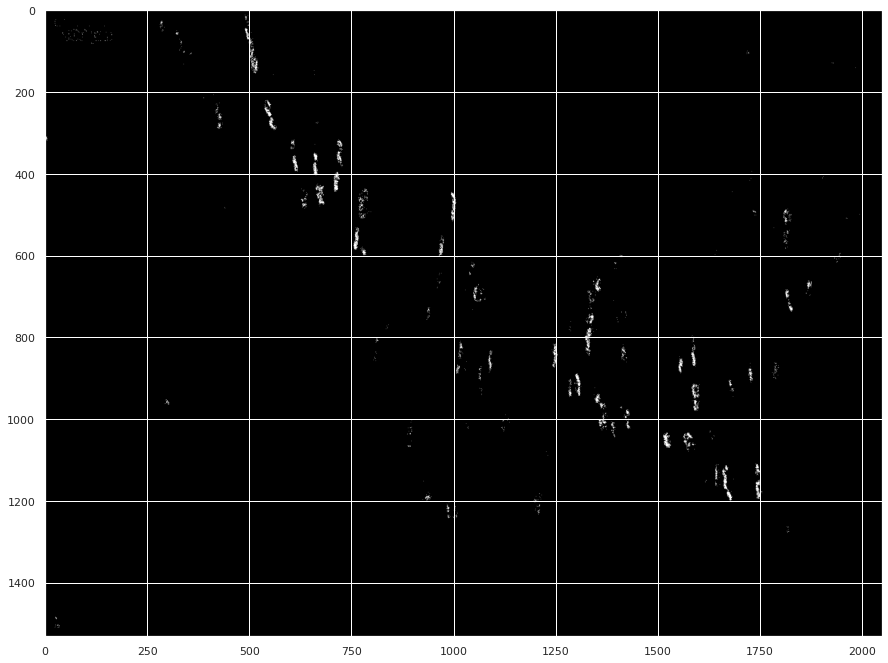

In [ ]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 3.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
plt.figure(figsize = (15,15))
plt.imshow(img_2_reshape, cmap = 'gray', )


### v1.1

function executed
implement_model concluded


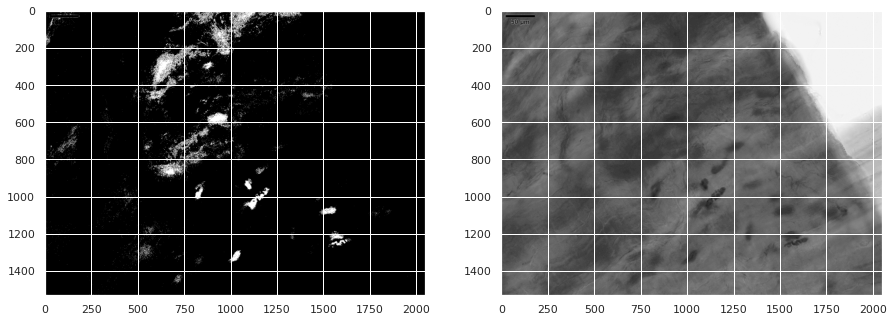

In [ ]:
path_das_imagens
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
fig, axs = plt.subplots(ncols = 2,figsize=(15,15))
axs[0].imshow(img_2_reshape, cmap = 'gray', )
axs[1].imshow(imagem, cmap = 'gray', )

function executed
implement_model concluded


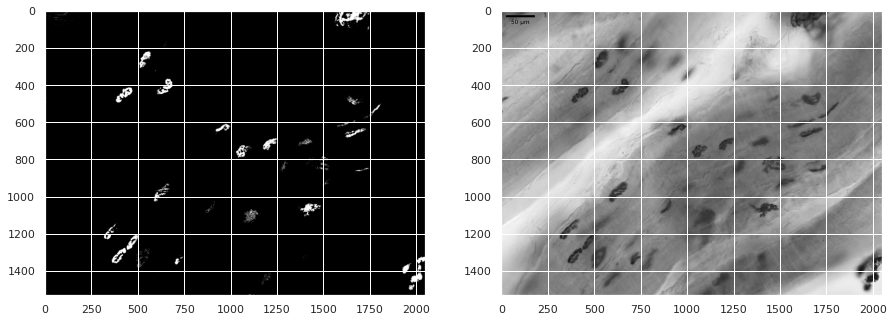

In [ ]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
fig, axs = plt.subplots(ncols= 2,figsize=(15,15))
axs[0].imshow(img_2_reshape, cmap = 'gray', )
axs[1].imshow(imagem, cmap = 'gray', )

function executed
implement_model concluded


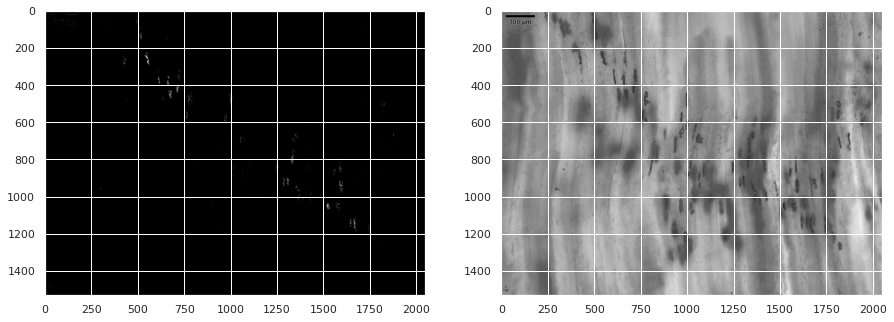

In [ ]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 3.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
fig, axs = plt.subplots(ncols = 2,figsize=(15,15))
axs[0].imshow(img_2_reshape, cmap = 'gray', )
axs[1].imshow(imagem, cmap = 'gray', )

### v1.2.0

function executed
implement_model concluded


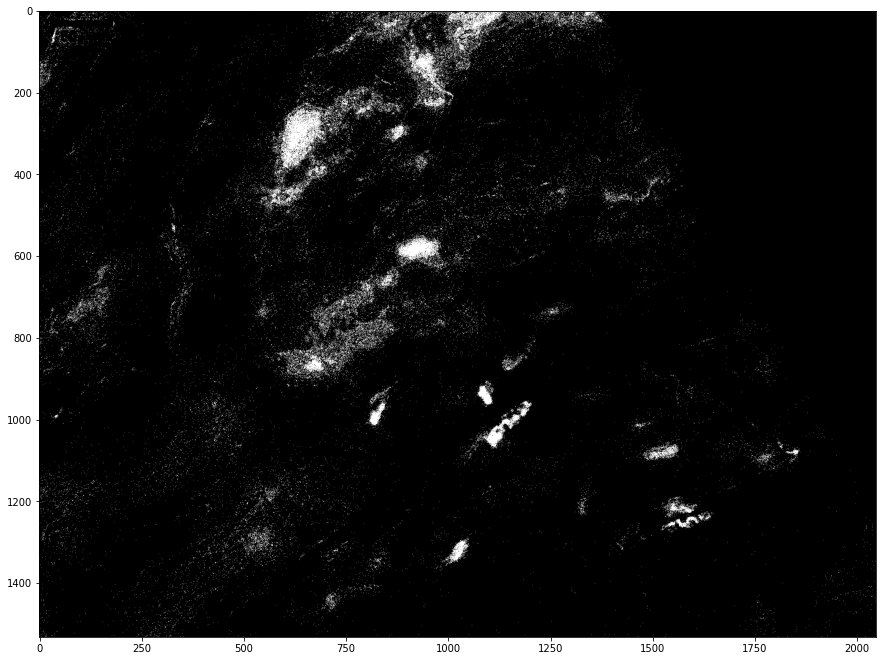

In [33]:
path_das_imagens
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )

function executed
implement_model concluded


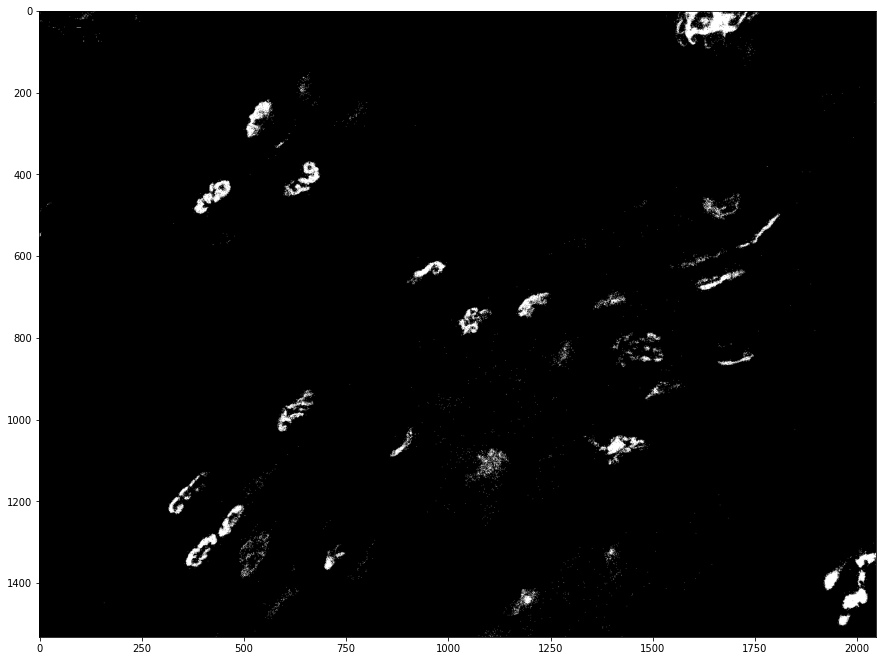

In [34]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )


function executed
implement_model concluded


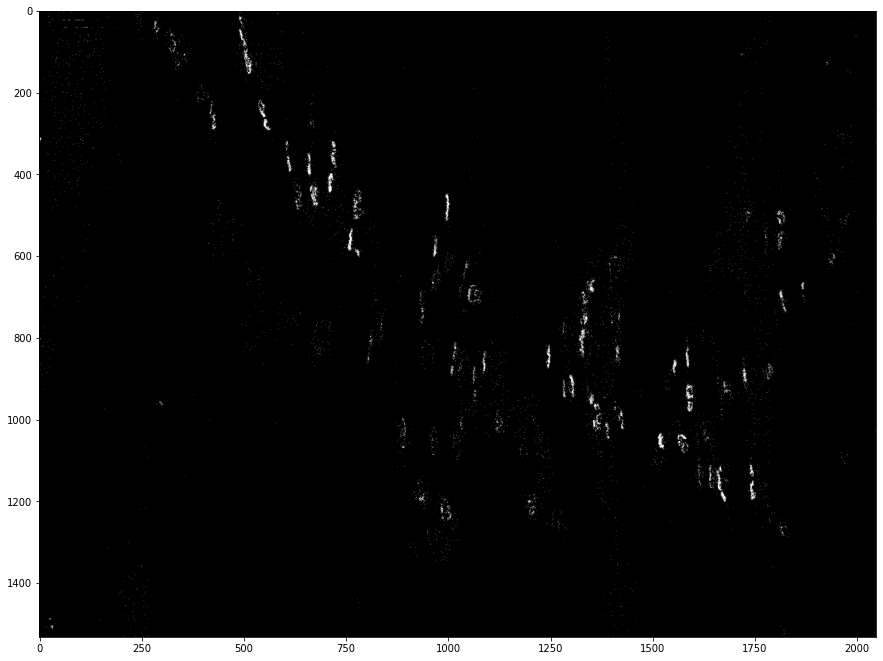

In [35]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 3.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )


### v1.2.1

function executed
implement_model concluded


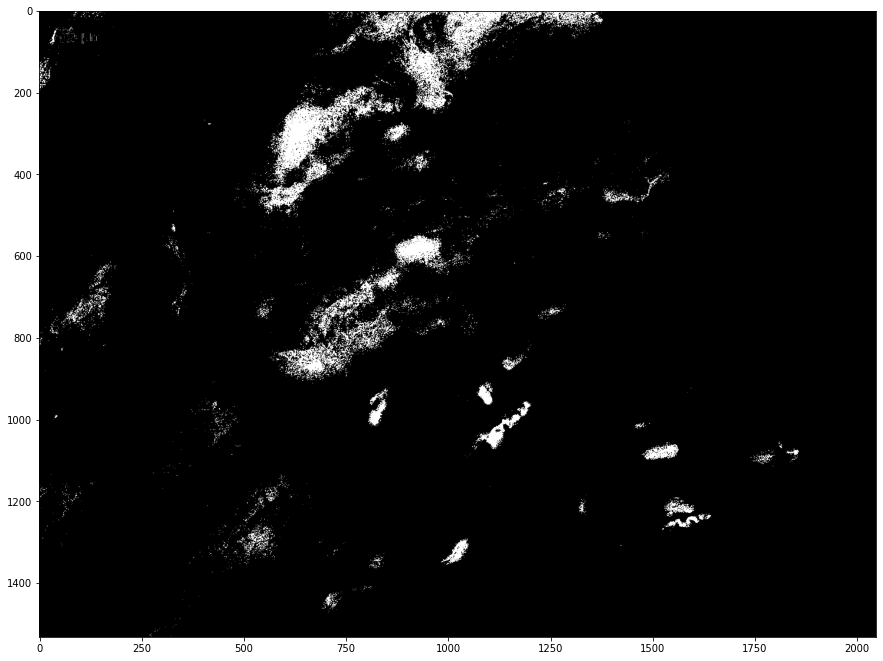

In [25]:
path_das_imagens
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )

function executed
implement_model concluded


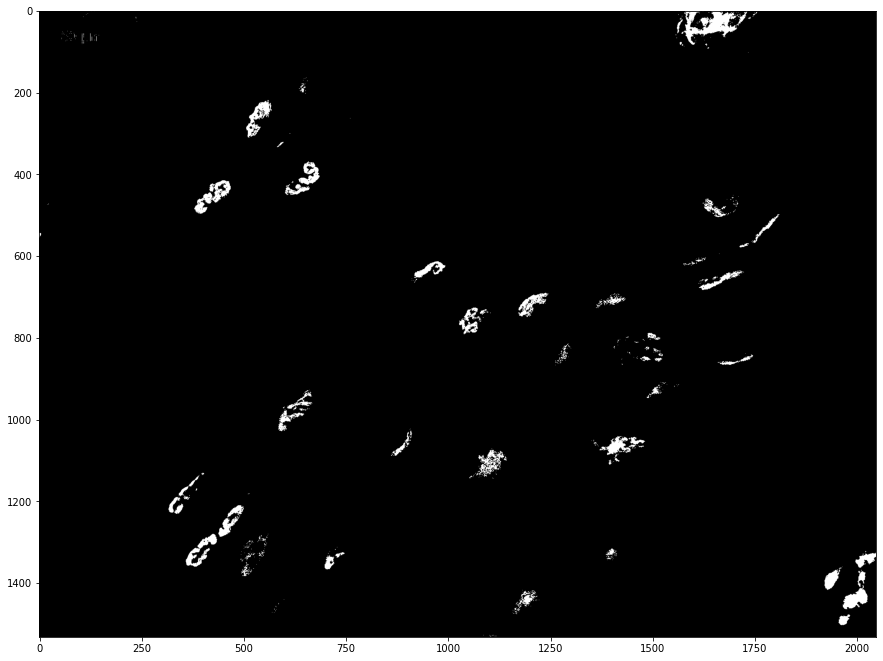

In [26]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )

function executed
implement_model concluded


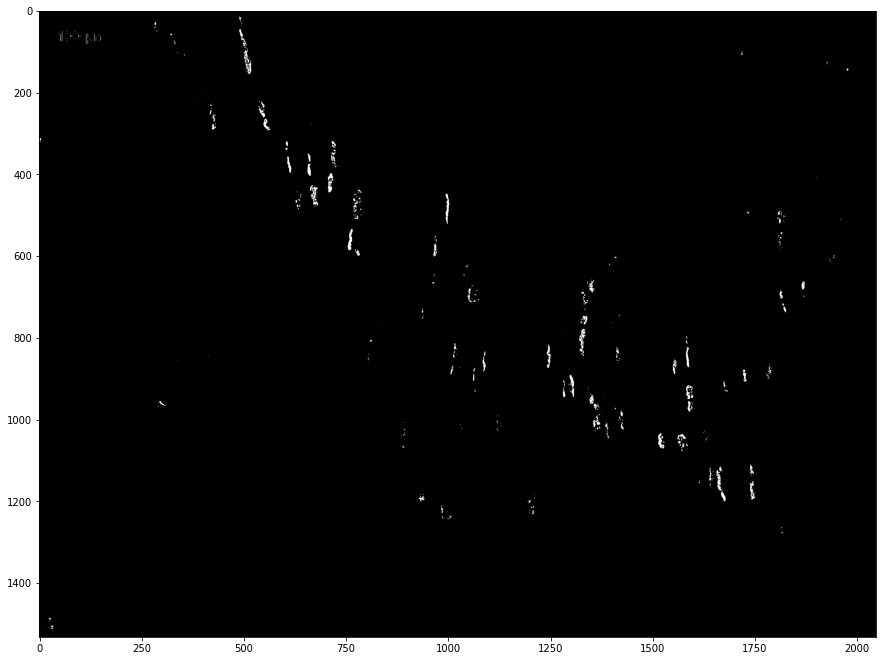

In [27]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 3.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )


### v1.2.2

function executed
implement_model concluded


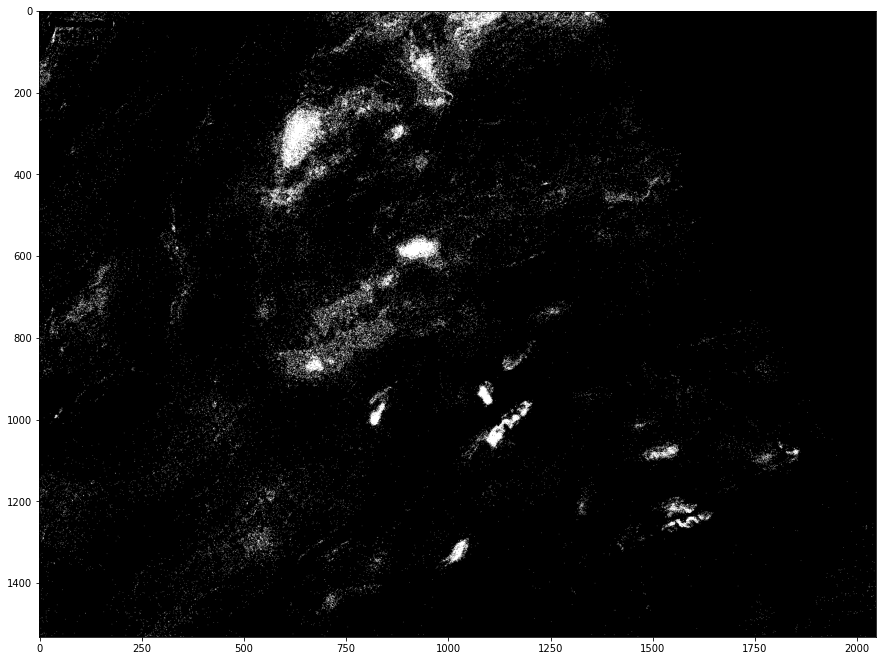

In [16]:
path_das_imagens
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 1.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )

function executed
implement_model concluded


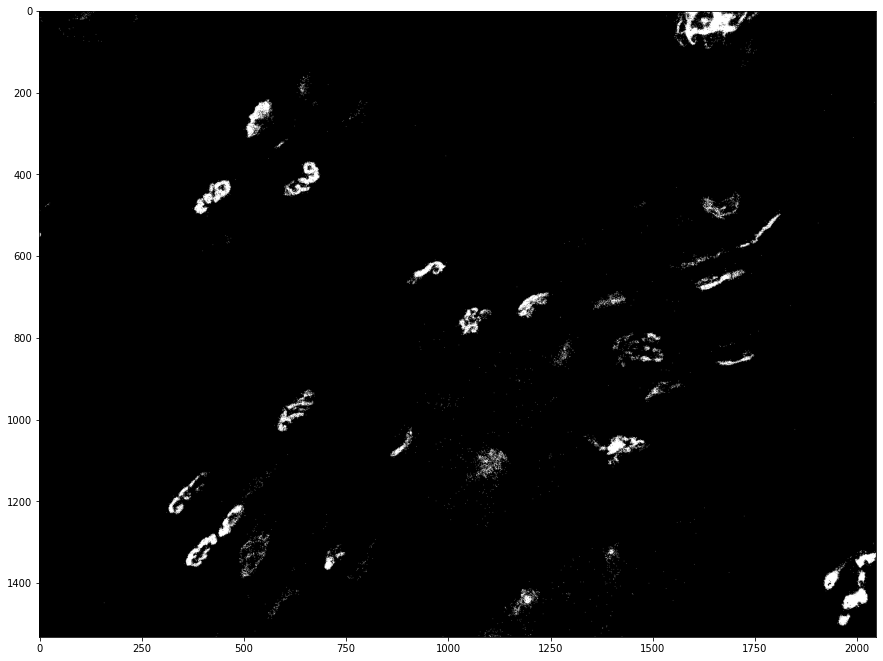

In [17]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 2.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)

plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )

function executed
implement_model concluded


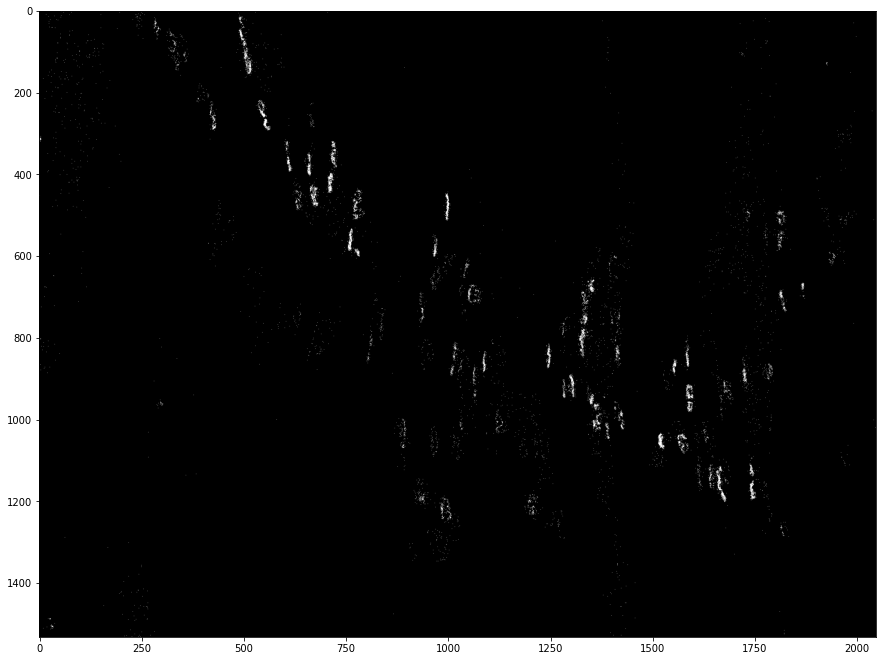

In [18]:
df2, a, b, imagem = implement_model('/content/drive/My Drive/Colab Notebooks/arrombado/cell 3.jpg')
ypredict_2 = model.predict(df2)

img_2_reshape = ypredict_2.reshape(a,b)
plt.figure(figsize = (15,15))
plt.grid(False)
plt.imshow(img_2_reshape, cmap = 'gray', )


# Results

For a first run, the results are very proeminent. They have segmented mostly the area of interest, as the comparison pics show. On a closer look, the segmented areas are not very similar to the region of interest, so, further improoving is needed. 

There are very small white dots sprinkled in some parts of the pictures, without representing nothing of interest. Also, the oposite is quite true, with some big white areas that are not a region of interest

For the small and big white areas, a top hat and white hat transform might take care of this issue

And also, the images that were loaded to the feature extractor were not preprocessed, so they were not standardized. A preprocessing such as histogram equalization might work for it

Ideas:

1. Preprocessing of images, with the goal to 'normalize' the image
2. Post processing of image to remove those small and big elements of the image
3. Improve existing features within the current feature bank





# Preprocessing
Images normalization is the goal of this section. 

Process such as histogram equalization wil be experimented 

# Post Processing

# Feature improvement

In [ ]:
#